<a href="https://colab.research.google.com/github/Atulkumar611052/Assignment--1/blob/main/EDA%20AND%20PREPROCESSING%20ON%20APP%20DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/app.csv")
df

,App,Rating,Reviews,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,Free,0,Everyone
1,Coloring book moana,3.9,967,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,Free,0,Everyone
3,Sketch - Draw & Paint,4.5,215644,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,4.3,967,Free,0,Everyone
...,...,...,...,...,...,...
9355,FR Calculator,4.0,7,NaN,0,Everyone
9356,Sya9a Maroc - FR,4.5,38,NaN,0,Everyone
9357,Fr. Mike Schmitz Audio Teachings,5.0,4,Free,0,Everyone
9358,The SCP Foundation DB fr nn5n,4.5,114,Free,0,Mature 17+


In [3]:
df.head()

,App,Rating,Reviews,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,Free,0,Everyone
1,Coloring book moana,3.9,967,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,Free,0,Everyone
3,Sketch - Draw & Paint,4.5,215644,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,4.3,967,Free,0,Everyone


In [4]:
df.sample(5)

,App,Rating,Reviews,Type,Price,Content Rating
3965,F-Secure AV Test,4.5,1250,Free,0,Everyone
4302,Android P Launcher 9.0 launcher,4.0,164,Free,0,Everyone
9083,Signal Spy - Monitor Signal Strength & Data Usage,4.4,875,Free,0,Everyone
1937,Toy Pop Cubes,4.5,5761,Free,0,Everyone
8578,ES Classic Theme,4.3,20865,Free,0,Everyone


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Rating          9352 non-null   float64
 2   Reviews         9360 non-null   int64  
 3   Type            9344 non-null   object 
 4   Price           9360 non-null   object 
 5   Content Rating  9360 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 438.9+ KB


.) There are 6 columns and 9360 rows in given dataset

.)Except Rating and Reviews all features are object type

.) There are sme null values present in Rating and Type feature

2.2 Check summary statistics and write youyr findings

In [6]:
df.describe()

,Rating,Reviews
count,9352.000000,9.360000e+03
mean,4.191948,5.143767e+05
std,0.515403,3.145023e+06
min,1.000000,1.000000e+00
25%,4.000000,1.867500e+02
50%,4.300000,5.955000e+03
75%,4.500000,8.162750e+04
max,5.000000,7.815831e+07


In [7]:
pd.set_option("display.float_format",lambda x: "% 3f" %x)
df.describe()

,Rating,Reviews
count,9352.000000,9360.000000
mean,4.191948,514376.705235
std,0.515403,3145023.255620
min,1.000000,1.000000
25%,4.000000,186.750000
50%,4.300000,5955.000000
75%,4.500000,81627.500000
max,5.000000,78158306.000000


In [8]:
df.describe(include='O')

,App,Type,Price,Content Rating
count,9360,9344,9360,9360
unique,8190,2,73,6
top,ROBLOX,Free,0,Everyone
freq,9,8700,8715,7414


In [9]:
df['Price'].value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [10]:
df['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

2.3 Check NaN values and impute them

In [11]:
df.isnull()

,App,Rating,Reviews,Type,Price,Content Rating
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9355,False,False,False,True,False,False
9356,False,False,False,True,False,False
9357,False,False,False,False,False,False
9358,False,False,False,False,False,False


In [12]:
print(df.isnull().sum())
print("\n")
print(df.isnull().sum()/len(df))
print("\n percentage of null values")
print(df.isnull().sum()/len(df)*100)

App                0
Rating             8
Reviews            0
Type              16
Price              0
Content Rating     0
dtype: int64


App               0.000000
Rating            0.000855
Reviews           0.000000
Type              0.001709
Price             0.000000
Content Rating    0.000000
dtype: float64

 percentage of null values
App               0.000000
Rating            0.085470
Reviews           0.000000
Type              0.170940
Price             0.000000
Content Rating    0.000000
dtype: float64


In [13]:
# What isnull() function recognises as missing values
df_rating=pd.DataFrame({'values':df['Rating']})
df_rating

,values
0,4.100000
1,3.900000
2,4.700000
3,4.500000
4,4.300000
...,...
9355,4.000000
9356,4.500000
9357,5.000000
9358,4.500000


Univariate analysis of numerical feature :Rating

Check summary statistics of rating

In [14]:
df['Rating'].describe()

count    9352.000000
mean        4.191948
std         0.515403
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<Axes: ylabel='Frequency'>

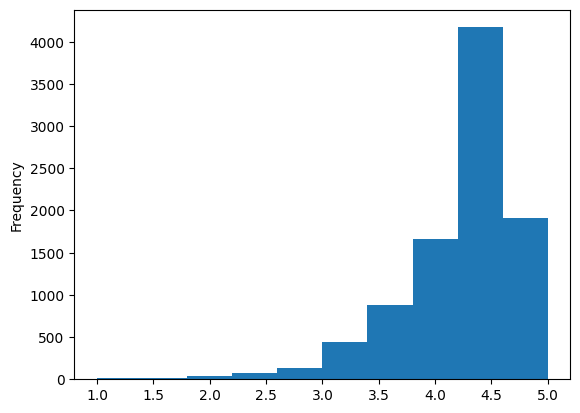

In [15]:
## Check the rating distribution
df["Rating"].plot(kind='hist')

Text(0.5, 1.0, 'Distribution of rating')

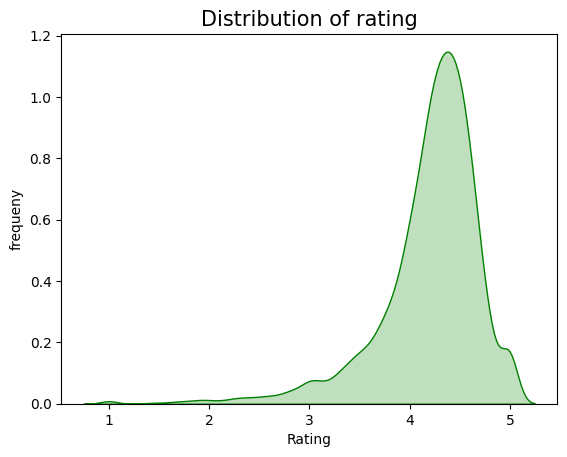

In [16]:
# Rating Distribution
g=sns.kdeplot(df.Rating,color='green',shade=True)
g.set_xlabel("Rating")
g.set_ylabel("frequeny")
plt.title("Distribution of rating",size=15)

Convert rating to high and low categories (>3.5 is high, rest is low)

In [17]:
# Method-1: Convert Rating to high and low categories sing loop
rating_cat=dict()
for i in range(0,len(df['Rating'])):
  if df['Rating'].iloc[i]>=3.5:
    rating_cat[i]="High"
  else:
    rating_cat[i]='Low'

# Add Categorical column to the data
final_df=df.assign(rating_cat=pd.Series(rating_cat).values)
final_df.sample(10)

,App,Rating,Reviews,Type,Price,Content Rating,rating_cat
5939,감성학원 BL 첫사랑,4.400000,190,Free,0,Everyone,High
5531,BA4You,2.100000,87,Free,0,Everyone,Low
8776,Airway Ex - Intubate. Anesthetize. Train.,4.300000,123,Free,0,Everyone,High
1979,DisneyNOW – TV Shows & Games,4.300000,82471,Free,0,Everyone,High
329,Viber Messenger,4.300000,11334799,Free,0,Everyone,High
5847,English Grammar Test,4.600000,104676,Free,0,Everyone,High
6079,MI-BP,5.000000,1,Free,0,Everyone,High
6873,CP Ready,4.500000,56,Free,0,Everyone,High
2934,SportsManias Fantasy Team News,3.500000,4057,Free,0,Everyone,High
539,Heart mill,3.300000,4631,Free,0,Mature 17+,Low


In [19]:
# Method-2: Using Lambda function
df['cat']=df.apply(lambda x:'High' if(x['Rating'])>3.5 else 'Low',axis=1)
df.sample(10)

,App,Rating,Reviews,Type,Price,Content Rating,cat
8503,The Great Wobo Escape Ep. 1,4.200000,5449,Free,0,Everyone 10+,High
4062,What was I in my Past Life,3.700000,7453,Free,0,Everyone,High
2006,Minion Rush: Despicable Me Official Game,4.500000,10216997,Free,0,Everyone 10+,High
908,Crackle - Free TV & Movies,3.700000,388089,Free,0,Teen,High
8373,DreamStream By EL AL,3.400000,595,Free,0,Everyone,Low
6753,CM S Pen Add-on(ROOT),3.600000,373,Free,0,Everyone,High
7373,Piano Free - Keyboard with Magic Tiles Music G...,4.500000,785622,Free,0,Everyone,High
7077,Resume Builder - Free CV Maker & Premium Templ...,4.600000,770,Free,0,Everyone,High
2404,Instagram,4.500000,66577313,Free,0,Teen,High
551,2RedBeans,4.000000,337,Free,0,Mature 17+,High


In [20]:
df['cat'].value_counts()

High    8457
Low      903
Name: cat, dtype: int64

<Axes: ylabel='Density'>

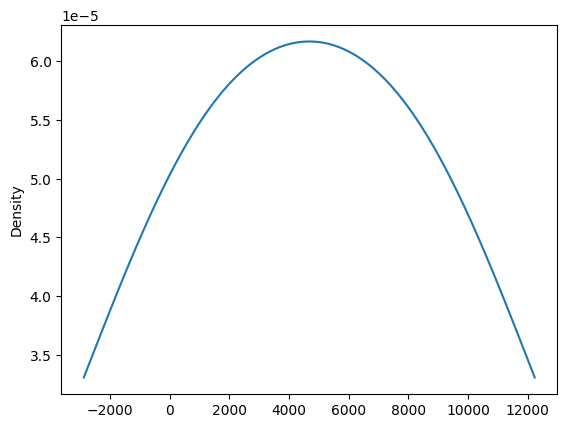

In [24]:
df['cat'].value_counts().plot(kind='kde')

<Axes: >

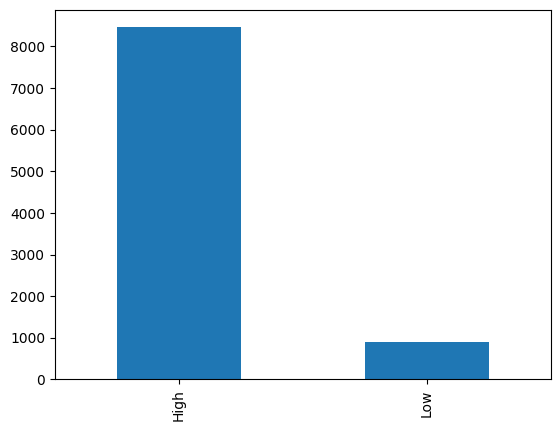

In [22]:
df['cat'].value_counts().plot(kind='bar')

Univariate analysis of numerical feature :Reviews


<Axes: >

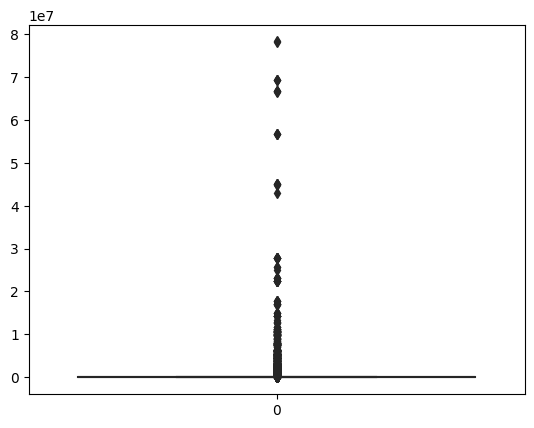

In [29]:
sns.boxplot(df["Reviews"],color='green')

<Axes: xlabel='Reviews', ylabel='Density'>

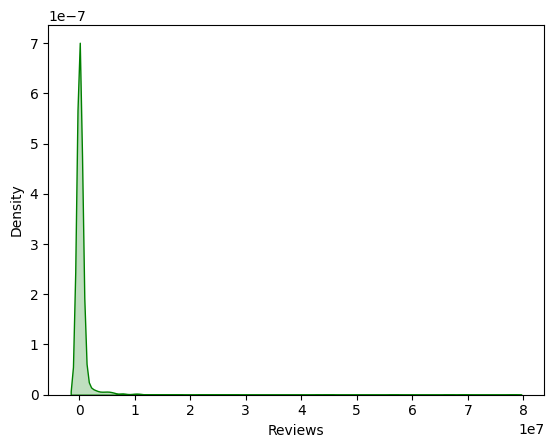

In [35]:
sns.kdeplot(df['Reviews'],color='Green',shade=True)

In [36]:
# Let's check the sample having reviews less then 100
df[df['Reviews']<100].shape

(1925, 7)

In [46]:
# Let's check the sample having reviews more then 50000
df[df['Reviews']>5000000].shape

(230, 7)

Way to deal with such feature

1.1 log Transformation

1.2 Outlier Treatment

In [50]:
df_log=df.copy()
df_log['Reviews']=np.log(df_log['Reviews'])
df_log.head(10)

,App,Rating,Reviews,Type,Price,Content Rating,cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.100000,5.068904,Free,0,Everyone,High
1,Coloring book moana,3.900000,6.874198,Free,0,Everyone,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.700000,11.379508,Free,0,Everyone,High
3,Sketch - Draw & Paint,4.500000,12.281384,Free,0,Teen,High
4,Pixel Draw - Number Art Coloring Book,4.300000,6.874198,Free,0,Everyone,High
5,Paper flowers instructions,4.400000,5.117994,Free,0,Everyone,High
6,Smoke Effect Photo Maker - Smoke Editor,3.800000,5.181784,Free,0,Everyone,High
7,Infinite Painter,4.100000,10.513661,Free,0,Everyone,High
8,Garden Coloring Book,4.400000,9.531771,Free,0,Everyone,High
9,Kids Paint Free - Drawing Fun,4.700000,4.795791,Free,0,Everyone,High


In [51]:
df_log['Reviews']

0        5.068904
1        6.874198
2       11.379508
3       12.281384
4        6.874198
          ...    
9355     1.945910
9356     3.637586
9357     1.386294
9358     4.736198
9359    12.894978
Name: Reviews, Length: 9360, dtype: float64

<Axes: xlabel='Reviews', ylabel='Density'>

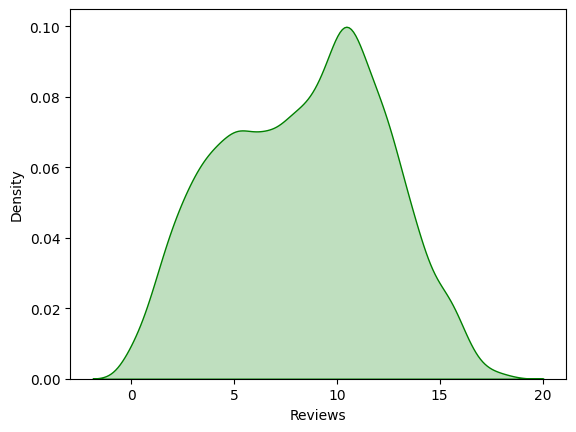

In [52]:
sns.kdeplot(df_log.Reviews,color='Green',shade=True)

<Axes: >

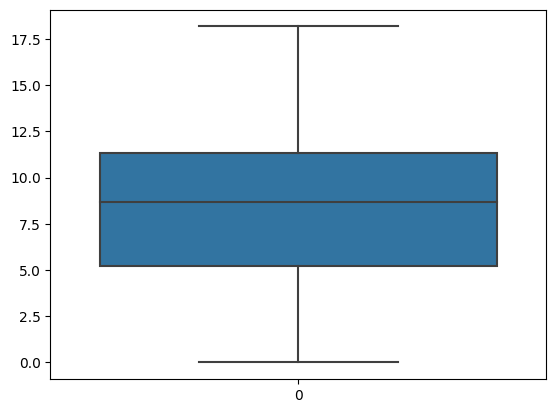

In [53]:
sns.boxplot(df_log.Reviews)

In [56]:
# Using IQR Method
Q1=df['Reviews'].quantile(0.25)
Q3=df['Reviews'].quantile(0.75)
IQR= Q3-Q1
print(Q1)
print(Q3)
print(IQR)

186.75
81627.5
81440.75


Here IQR is very high so lower _whisker and upper_whisker will take extreme in this case.Here log transformation of z-score scaling will be preferred

In [59]:
lower_whisker=Q1-(1.5*IQR)
upper_whisker=Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)

-121974.375
203788.625


In [60]:
df.loc[df['Reviews']>203788.625].shape

(1634, 7)

In [61]:
df.shape

(9360, 7)

In [65]:
df_out=df.loc[(df['Reviews']<upper_whisker) & (df['Reviews']>lower_whisker)]
print(df_out)
print(df_out.shape)

                                                    App    Rating  Reviews  \
0        Photo Editor & Candy Camera & Grid & ScrapBook  4.100000      159   
1                                   Coloring book moana  3.900000      967   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...  4.700000    87510   
4                 Pixel Draw - Number Art Coloring Book  4.300000      967   
5                            Paper flowers instructions  4.400000      167   
...                                                 ...       ...      ...   
9354                                        Chemin (fr)  4.800000       44   
9355                                      FR Calculator  4.000000        7   
9356                                   Sya9a Maroc - FR  4.500000       38   
9357                   Fr. Mike Schmitz Audio Teachings  5.000000        4   
9358                      The SCP Foundation DB fr nn5n  4.500000      114   

      Type Price Content Rating   cat  
0     Free     0       

<Axes: >

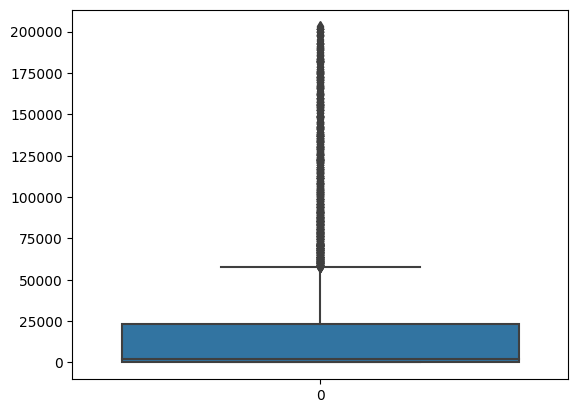

In [66]:
sns.boxplot(df_out.Reviews)

since IQR is very high so we can go for log transformation in this case

<Axes: xlabel='Reviews', ylabel='Density'>

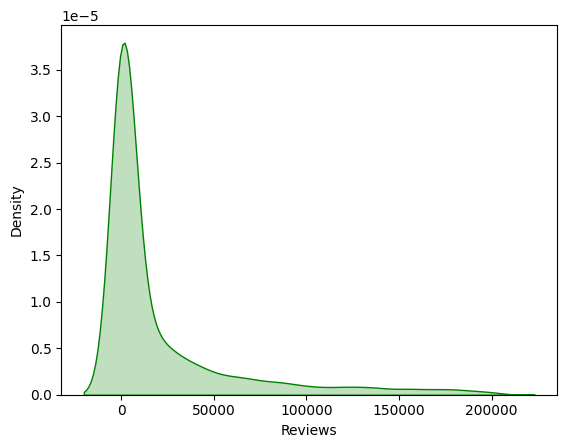

In [68]:
sns.kdeplot(df_out.Reviews,color='Green',shade=True)

# Let's analyze price column and make it numerical

In [69]:
# Check value counts
df['Price'].value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [74]:
# Replaxce $ with space
df['Price']=df['Price'].str.replace('$','')
df['Price'].value_counts()


0          8715
 2.99       114
 0.99       106
 4.99        70
 1.99        59
           ... 
 1.29         1
 299.99       1
 379.99       1
 37.99        1
 1.20         1
Name: Price, Length: 73, dtype: int64

<Axes: ylabel='Frequency'>

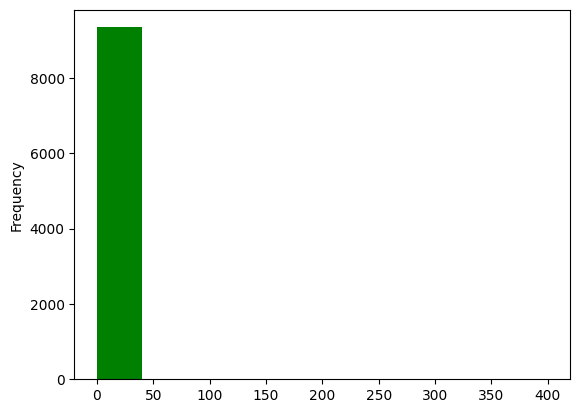

In [80]:
# Convert column to numeric after dropping non numeric values
df['Price']=pd.to_numeric(df['Price'],errors='coerce')
df['Price'].plot(kind='hist',color='Green')

In [86]:
df[df['Price']>100]

,App,Rating,Reviews,Type,Price,Content Rating,cat
4036,most expensive app (H),4.300000,6,Paid,399.990000,Everyone,High
4189,💎 I'm rich,3.800000,718,Paid,399.990000,Everyone,High
4194,I'm Rich - Trump Edition,3.600000,275,Paid,400.000000,Everyone,High
5042,I am rich,3.800000,3547,Paid,399.990000,Everyone,High
5045,I am Rich Plus,4.000000,856,Paid,399.990000,Everyone,High
5046,I am rich VIP,3.800000,411,Paid,299.990000,Everyone,High
5047,I Am Rich Premium,4.100000,1867,Paid,399.990000,Everyone,High
5048,I am extremely Rich,2.900000,41,Paid,379.990000,Everyone,Low
5049,I am Rich!,3.800000,93,Paid,399.990000,Everyone,High
5050,I am rich(premium),3.500000,472,Paid,399.990000,Everyone,Low


In [89]:
df[df['Price']>300]

,App,Rating,Reviews,Type,Price,Content Rating,cat
4036,most expensive app (H),4.300000,6,Paid,399.990000,Everyone,High
4189,💎 I'm rich,3.800000,718,Paid,399.990000,Everyone,High
4194,I'm Rich - Trump Edition,3.600000,275,Paid,400.000000,Everyone,High
5042,I am rich,3.800000,3547,Paid,399.990000,Everyone,High
5045,I am Rich Plus,4.000000,856,Paid,399.990000,Everyone,High
5047,I Am Rich Premium,4.100000,1867,Paid,399.990000,Everyone,High
5048,I am extremely Rich,2.900000,41,Paid,379.990000,Everyone,Low
5049,I am Rich!,3.800000,93,Paid,399.990000,Everyone,High
5050,I am rich(premium),3.500000,472,Paid,399.990000,Everyone,Low
5053,I Am Rich Pro,4.400000,201,Paid,399.990000,Everyone,High


Different way to deal with outlier

In [95]:
# Method-1: Create categories using lambda function
df['price_cat']=df.apply(lambda x: 0 if (x['Price'])==0
                         else 1 if (x['Price'])>0 and (x['Price'])<10
                         else 2 if (x['Price'])>=10 and (x['Price'])<100
                         else 3 ,axis=1)

df.sample(10)

,App,Rating,Reviews,Type,Price,Content Rating,cat,price_cat
4663,AB Mobile App,3.400000,2105,Free,0.000000,Everyone,Low,0
622,Chat Kids - Chat Room For Kids,4.700000,6,Free,0.000000,Mature 17+,High,0
5927,Lezhin Comics - Daily Releases,3.000000,28447,Free,0.000000,Teen,Low,0
1603,Barbie™ Fashion Closet,4.100000,68057,Free,0.000000,Everyone,High,0
2359,mobileRx Pharmacy,2.500000,124,Free,0.000000,Everyone,Low,0
1531,WedMeGood - Wedding Planner,4.600000,1658,Free,0.000000,Everyone,High,0
9079,Forgotten Hill: Puppeteer,4.500000,2917,Free,0.000000,Teen,High,0
670,Thai Handwriting,4.300000,3168,Free,0.000000,Everyone,High,0
2818,ESPN,4.200000,521138,Free,0.000000,Everyone 10+,High,0
9087,Portable Wi-Fi hotspot Premium,3.700000,481,Paid,0.990000,Everyone,High,1


In [97]:
df['price_cat'].value_counts()

0    8715
1     572
2      58
3      15
Name: price_cat, dtype: int64

In [98]:
# Method 2: We can drop instances having more than 200 as they are very few in number
df_price=df[df['Price']>200]
df_price.shape

(15, 8)

In [112]:
df.sample(10)

,App,Rating,Reviews,Type,Price,Content Rating,cat,price_cat
3210,Funny Ringtones,4.400000,7146,Free,0.000000,Everyone 10+,High,0
7158,Cartoon Wars 3,4.100000,137674,Free,0.000000,Teen,High,0
6709,Leica CL,2.600000,8,Free,0.000000,Everyone,Low,0
4872,AG Subway Simulator Mobile,4.500000,623,Paid,0.990000,Everyone,High,1
5101,The Hunt for the Lost Treasure,4.600000,7148,Paid,2.990000,Everyone,High,1
9148,Drift Legends,4.200000,33788,Free,0.000000,Everyone,High,0
6716,CL e-bank,4.000000,210,Free,0.000000,Everyone,High,0
3682,Gps Route Finder,4.400000,652,Free,0.000000,Everyone,High,0
8509,The Great Wobo Escape Ep.1,4.300000,11,Paid,1.990000,Everyone 10+,High,1
9130,HD Themes Toyota Cruiser 200,3.700000,3,Free,0.000000,Teen,High,0


# Encode Categorical feature

In [114]:
df_final=pd.get_dummies(df,columns=['Type',"cat","Content Rating"],drop_first=True)
df_final.sample(5)

,App,Rating,Reviews,Price,price_cat,Type_Paid,cat_Low,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
7489,Video Downloader - for Instagram Repost App,4.800000,332623,0.000000,0,0,0,1,0,0,0,0
10,Text on Photo - Fonteee,4.400000,13880,0.000000,0,0,0,1,0,0,0,0
4898,Clarksburg AH,1.000000,1,0.000000,0,0,1,1,0,0,0,0
6913,Webmail web mobile app,2.300000,395,0.000000,0,0,1,1,0,0,0,0
4772,Google Ads,4.300000,29331,0.000000,0,0,0,1,0,0,0,0


## Data Preperation
Drop irreverent column depending on your objectives

In [115]:
df_final=df_final.drop(['App','Price'],axis=1)
df_final.sample(7)

,Rating,Reviews,price_cat,Type_Paid,cat_Low,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
4155,4.000000,6263,0,0,0,1,0,0,0,0
7141,3.900000,31552,0,0,0,0,0,0,1,0
3543,3.800000,2093,0,0,0,1,0,0,0,0
1583,4.500000,3778921,0,0,0,1,0,0,0,0
5174,4.400000,129409,1,1,0,1,0,0,0,0
2533,4.700000,1084945,0,0,0,0,0,0,1,0
9125,4.500000,86,0,0,0,0,0,0,1,0


# Srandardise The Data

Here We need to scale only one column that is 'Reviews'

In [117]:
# Method1: scale all the feature using standardscaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [127]:
df_scaled=pd.DataFrame(sc.fit_transform(df_final),columns=df_final.columns)
df_scaled.sample(6)

,Rating,Reviews,price_cat,Type_Paid,cat_Low,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
7632,0.403690,-0.149860,-0.255171,-0.271822,-0.326765,-1.951888,-0.210460,-0.227604,2.763094,-0.010337
6373,0.791756,-0.163317,-0.255171,-0.271822,-0.326765,0.512325,-0.210460,-0.227604,-0.361913,-0.010337
3215,0.403690,-0.153134,-0.255171,-0.271822,-0.326765,0.512325,-0.210460,-0.227604,-0.361913,-0.010337
2529,-1.148576,-0.160757,-0.255171,-0.271822,-0.326765,0.512325,-0.210460,-0.227604,-0.361913,-0.010337
3788,0.791756,-0.119935,-0.255171,-0.271822,-0.326765,-1.951888,4.751508,-0.227604,-0.361913,-0.010337
3707,0.209656,-0.163167,-0.255171,-0.271822,-0.326765,0.512325,-0.210460,-0.227604,-0.361913,-0.010337


In [125]:
# Method 2: Scale all the feature using MinMaxSacler
from sklearn.preprocessing import MinMaxScaler
# Create an object
min_max=MinMaxScaler()
min_max

MinMaxScaler()

In [128]:
df_scaled2=pd.DataFrame(min_max.fit_transform(df_final),columns=df_final.columns)
df_scaled2.sample(6)

,Rating,Reviews,price_cat,Type_Paid,cat_Low,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
1663,0.850000,0.000119,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
4440,0.775000,0.000006,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1536,0.775000,0.001002,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
6996,0.825000,0.000003,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
7064,0.650000,0.000011,0.333333,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2823,0.850000,0.001712,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
